<a href="https://colab.research.google.com/github/nayoung718/essa_python_1/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_ch9_1_4_pg_562~579_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 머신러닝 완벽 가이드 ch9.1 - 4 pg. 562 ~ 579 필사

## 9. 추천 시스템

### 9.1 추천 시스템의 개요와 배경

유튜브, 애플뮤직 맞춤 동영상

전자상거래 업체, 아마존, 이베이

- 온라인 스토어의 필수 요소, 추천 시스템 : 한정된 시간, 어떤 상품을 골라야할지 선택의 압박 -> 추천 : 사용자 원하는것 빨리 찾아내 즉각적 추천 : 사용자 선택 부담 해결

- 어떤 상품 구매했는지, 보고있거나 장바구니 넣은거, 평점과 평가, 사용자 취향, 클릭

-> 추천 상품

- 추천 시스템 : 콘텐츠 기반 필터링, 협업 필터링(최근접이웃 협업 필터링, 잠재 요인 협업 필터링)

넷플릭스 : 행렬 분해 이용한 잠재 요인 협업 필터링



### 9.2 콘텐츠 기반 필터링 추천 시스템

사용자 특정 아이템 매우 선호 시 그와 비슷한 콘텐츠 가진 다른 아이템 추천 : 영화

### 9.3 최근접 이웃 협업 필터링

사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식만을 기반으로 추천 수행 : 협업 필터링

-> 아직 평가하지 않은 아이템 예측 평가

-> 최근접 이웃 방식 / 잠재 요인 방식 (사용자-아이템 평점 행렬 데이터에만 의지)

- 사용자 기반 (당신과 비슷한 고객이 다음 구매) / 아이템 기반 (이 상품 선택한 다른 고객 다음 구매)

- 사용자 기반 : TOP-N / 아이템 기반 : 아이템간의 속성 상관없이 좋아/싫어하는지 평가 척도가 유사한 아이템 추천

### 9.4 잠재 요인 협업 필터링

- 잠재 요인 협업 필터링의 이해

사용자-아이템 평점 매트리스 속에 숨어있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법

행렬 분해 기반 모델 결합해 만든 모델

잠재 요인 끄집어 내기 : 사용자 - 잠재요인 행렬 / 아이템 - 잠재요인 행렬의 전치행렬 로 분해된 데이터셋 내적 곱으로 결합해 사용자가 예측하지 않은 아이템에 대한 평점 도출

- 사용자 - 잠재 요인 행렬 : 사용자 영화 장르 선호도 / 아이템 - 잠재 요인 행렬 : 영화 장르별 특성값

-사용자 - 아이템 평접 행렬 R에서 사용자의 아이템에 대한 평점 R(u: 사용자 아이디,i: 아이템 아이디)

아이템 - 잠재요인 영화별로 여러 장르 요소로 구성된 영화의 장르별 요소 행렬 Q로 가정 factor 1 영화의 Action 요소값, factor2 Romance 요소값, k 잠재 요인 칼럼인 장르별 요소

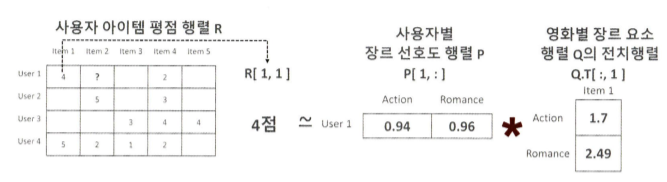

평점 : 사용자의 특정 영화 장르에 대한 선호도, 개별 영화의 그 장르적 특성값 반영해 결정

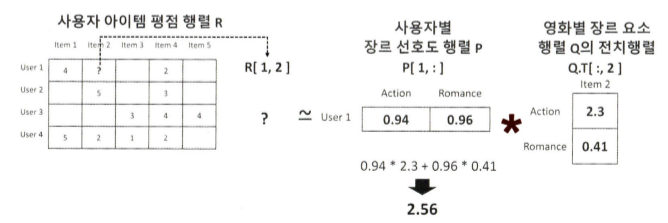

- 행렬 분해의 이해

factorization 인수 분해

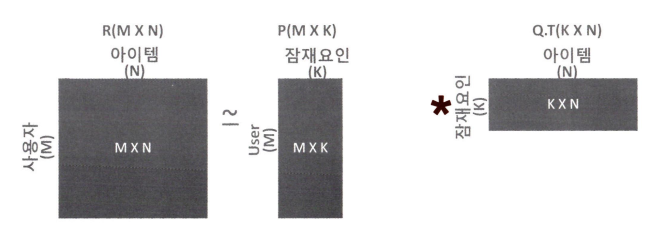

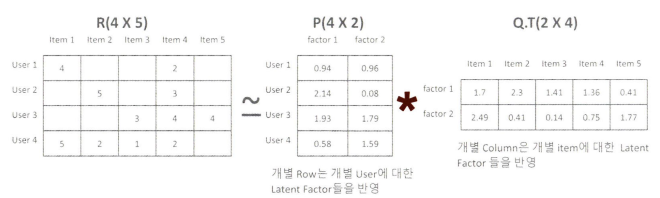

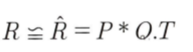

- 확률적 경사 하강법을 이용한 행렬 분해

p와 q 행렬로 계산된 예측 r 행렬 값이 실제 r 행렬 값과 가장 최소의 오류를 가질 수 잇도록 반복적인 비용 함수 최적화를 통해 p와 q 유추하기

1. p,q 임의의 값 가진 행렬로 설정
2. p,q,t값 곱해 예측 r행렬 계산하고 예측 r 행렬과 실제 r 행렬에 해당하는 오류 값 계산
3. 오류값 최소화하는 p, q 행렬 업데이트
4. 만족할만한 오류값 가질때까지 2,3 반복해 p,q 업데이트해 근사화

실제 값, 예측값 오류 최소화와 l2 규제 고려한 비용함수식 :

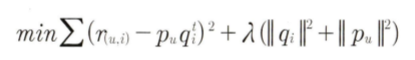

비용함수 최소화 - 회귀 계수 업데이트

SGD 기반 행렬 분해

In [1]:
import numpy as np

#원본 행렬 R 생성, 분해 행렬 P와 Q초기화, 잠재요인차원 K는 3으로 설정
R=np.array([[4,np.NaN, np.NaN, 2,np.NaN], [np.NaN,5, np.NaN,3,1],[np.NaN, np.NaN,3,4,4],[5,2,1,2,np.NaN]])
num_users, num_items = R.shape
K=3

#p와 q 행렬의 크기를 지정하고 정규분포를 가진 임의의 값으로 입력합니다.
np.random.seed(1)
P=np.random.normal(scale=1./K, size=(num_users,K))
Q=np.random.normal(scale=1./K, size=(num_items,K))

실제 r 행렬과 예측행렬의 오차 구하는 get_rmse() 함수 만들기

In [3]:
from sklearn.metrics import mean_squared_error

def get_rmse(R,P,Q, non_zeros):
  error=0
  #두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
  full_pred_matrix = np.dot(P, Q.T)

  #실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해  실제 R 행렬과 예측 행렬의 RMSE 추출
  x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = R[x_non_zero_ind,y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
  mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return mse

SGD 기반 행렬분해 수행

R에서 널 값 제외 데이터 행렬 인덱스 추출

In [4]:
#R>0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [(i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i, j]>0]

steps=1000
learning_rate = 0.01
r_lambda = 0.01

#SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
for step in range(steps):
  for i , j , r in non_zeros:
    #실제 값과 예측 값의 차이인 오류 값 구함
    eij = r - np.dot(P[i, :], Q[j, :].T)
    #Regularization을 반영한 SGD 업데이트 공식 적용
    P[i, :] = P[i, :] + learning_rate*(eij*Q[j,:]-r_lambda*P[i,:])
    Q[j, :] = Q[j, :] + learning_rate*(eij*P[i,:]-r_lambda*Q[j,:])
    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 50) ==0:
      print("### iteration step: ", step, "rmse: ", rmse)

### iteration step:  0 rmse:  10.624076694463124
### iteration step:  0 rmse:  10.618014679068558
### iteration step:  0 rmse:  10.576218984210831
### iteration step:  0 rmse:  10.564459092175609
### iteration step:  0 rmse:  10.565609906045793
### iteration step:  0 rmse:  10.55739787798783
### iteration step:  0 rmse:  10.545514418598977
### iteration step:  0 rmse:  10.533635410731863
### iteration step:  0 rmse:  10.49863593750931
### iteration step:  0 rmse:  10.486542278270159
### iteration step:  0 rmse:  10.487319115689543
### iteration step:  0 rmse:  10.478470526846758
### iteration step:  50 rmse:  0.25150266645638636
### iteration step:  50 rmse:  0.2513180667075575
### iteration step:  50 rmse:  0.2501971931317088
### iteration step:  50 rmse:  0.25002563176696924
### iteration step:  50 rmse:  0.25012822225833825
### iteration step:  50 rmse:  0.24949312005104154
### iteration step:  50 rmse:  0.24959043831435154
### iteration step:  50 rmse:  0.2491095108622687
### itera

In [5]:
#분해된 P, Q 함수를 P*Q.T로 예측 행렬 만들어 출력
pred_matrix = np.dot(P, Q.T)
print('예측행렬: \n', np.round(pred_matrix, 3))

#원본 행렬과 비교해 널 아닌값 큰차이 없음, 널값은 새로운 예측값으로 채워짐


예측행렬: 
 [[3.99  0.783 1.341 2.003 1.729]
 [6.702 4.978 0.953 2.98  1.003]
 [6.933 0.42  2.987 3.976 3.986]
 [4.968 2.005 1.007 2.018 1.163]]
